## Sample Claims Analysis and Predictions based off of AllState's public dataset

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# seaborn
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0
seaborn: 0.8.0


In [2]:
#Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [3]:
#Read the train dataset
train_ds = pandas.read_csv("train.csv")
print(train_ds.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  

In [4]:
#Read test dataset
test_ds = pandas.read_csv("test.csv")
#Save the id's for submission file
id = test_ds['id']
#Dropping id column
test_ds.drop('id', axis=1, inplace=True)

#Set pandas to print all rows and columns
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

#Reprinting with fixed parameters
print(train_ds.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

### Now that the data has been loaded, time to analyze with some statistics

In [5]:
#Size of the dataframe
print(train_ds.shape)
train_ds = train_ds.iloc[:,1:]

(188318, 132)


We can see that the dataset has 188318 instances, each having 132 attributes.

Following we dropped the first column 'id' as it is not useful in the prediction process.

In [6]:
#Statistical description
print(train_ds.describe())

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

Count is the same for all continuous columns, so we know that no attributes are missing in the 
training dataset. We can also conclude that no negative values are present in the data.

In [7]:
#Skewness of the distribution

print(train_ds.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


Values close to zero show less skew while loss shows the most skew.

# Data Visualization

Let's replace the usual box and density plots with Violin plots, which will allow us to vizualize
all the continuous attributes.

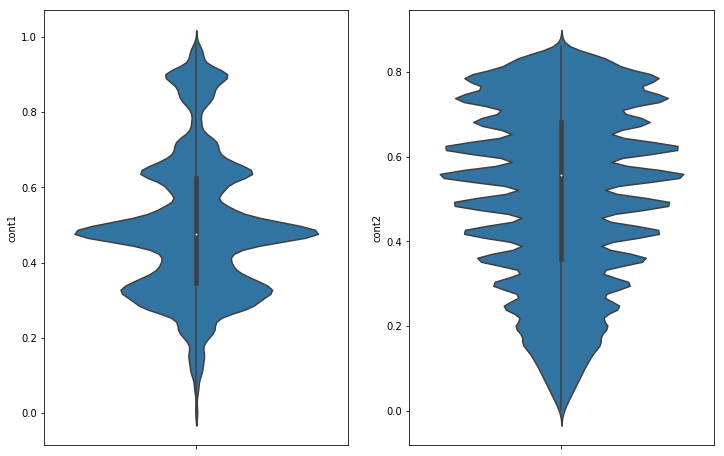

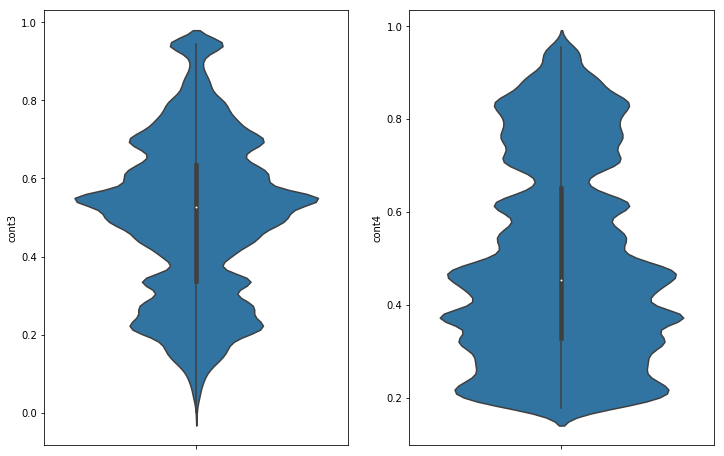

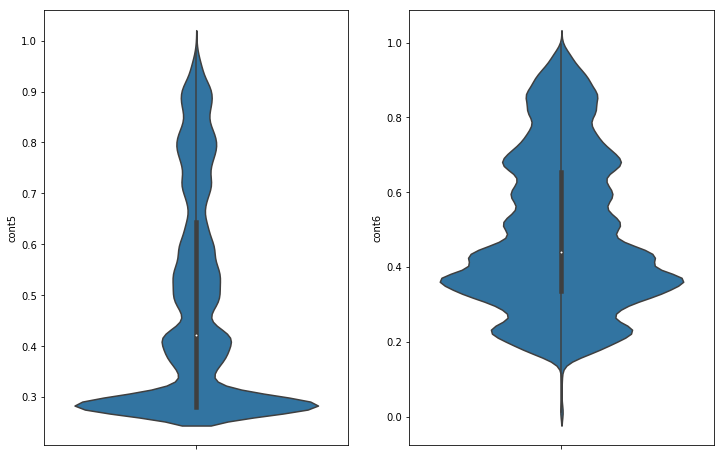

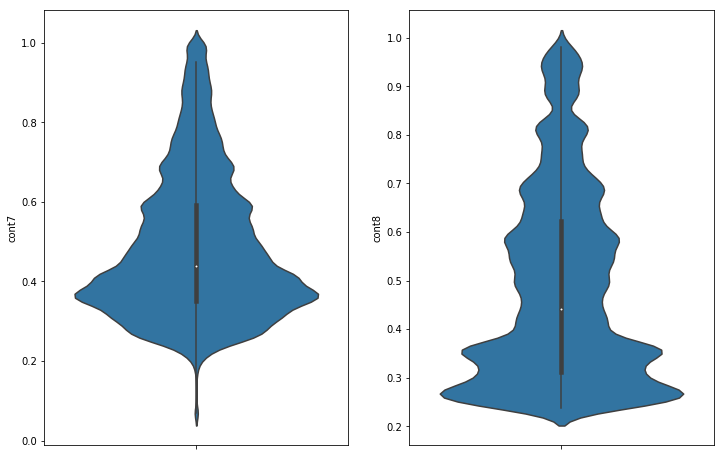

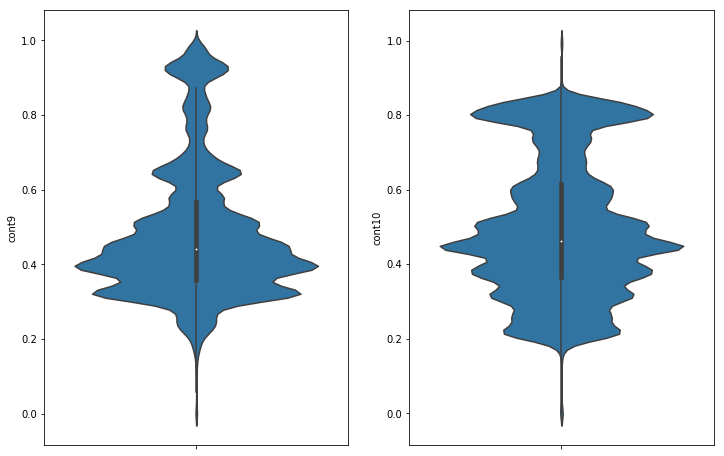

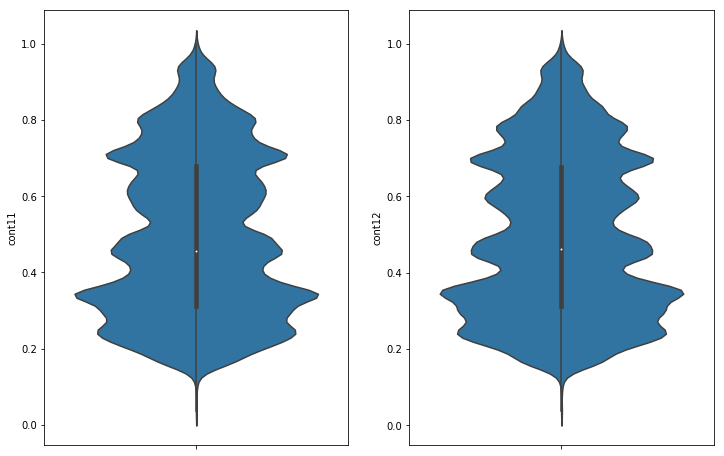

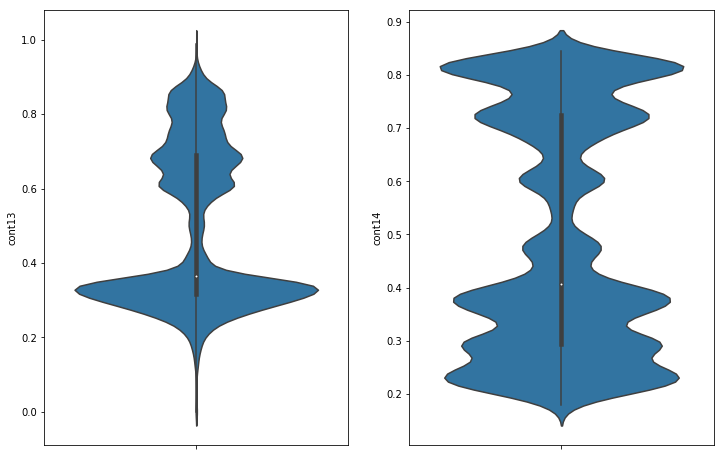

In [8]:
#Range of features considered
split = 116
#Number of features considered
size = 15
#Dataframe with only the continuous features
data = train_ds.iloc[:,split:]
#Names of all columns
col_names = data.columns
#Plot on a 7x2 grid
n_cols = 2
n_rows = 7


for i in range(n_rows):
    fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (12, 8))
    for j in range(n_cols):
        sns.violinplot(y = col_names[i * n_cols + j], data = train_ds, ax = ax[j])




Now let's perform a skew correction on that loss feature and plot it

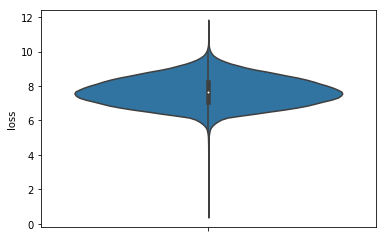

In [10]:
#log1p function applies log(1+x) to all elements of the loss column
train_ds["loss"] = numpy.log1p(train_ds["loss"])

sns.violinplot(data=train_ds, y="loss")
plt.show()

Looking good! Here we see the skew of the loss column has been corrected to a large extent.


Now let's take a look at the correlation between all the possible attribute pairs, and print out only the attribute pairs that are highly correlated to each other.

Note: Correclation requires continuous data, so we will ignore categorical data.

In [16]:
#Pearson co-efficient for all combinations
data_corr = data.corr()

#Threshold set to select only highly correlated attributes
threshold = 0.5

#List of pairs with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0, size):
    for j in range(i + 1, size):
        if (data_corr.iloc[i, j] >= threshold and data_corr.iloc[i, j] < 1) or (data_corr.iloc[i, j] < 0 and data_corr.iloc[i, j] <= -threshold):
            corr_list.append([data_corr.iloc[i, j], i, j])#storing correlation and columns index
            
#Let's sort to show highest to lowest correlation...
sorted_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

#And let's print them all
for v, i, j in sorted_corr_list:
    print("%s and %s = %.2f" % (col_names[i], col_names[j], v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53
